In [111]:
# Native libraries
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms

from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans


from sklearn.decomposition import PCA


In [112]:
directory = '../data/2017/seperate_datasets/'
limit = 200
mySeries = []
namesofMySeries = []
for filename in os.listdir(directory):
    if limit != 0:
        if filename.endswith(".csv"):
            df = pd.read_csv(directory+filename, header=0, index_col=0)
            df = df.loc[:, ["cpu_util"]]
        # and lastly, ordered the data according to our date index
            mySeries.append(df)
            namesofMySeries.append(filename[:-4])
        limit -= 1


In [113]:
for i in range(len(mySeries)):
    # scaler = MinMaxScaler()
    # mySeries[i] = MinMaxScaler().fit_transform(mySeries[i])
    mySeries[i] = mySeries[i].values.reshape(len(mySeries[i]))


In [114]:
som_x = som_y = math.ceil(math.sqrt(math.sqrt(len(mySeries))))


In [115]:
cluster_count = math.ceil(math.sqrt(len(mySeries)))


In [116]:
pca = PCA(n_components=100)

mySeries_transformed = pca.fit_transform(mySeries)


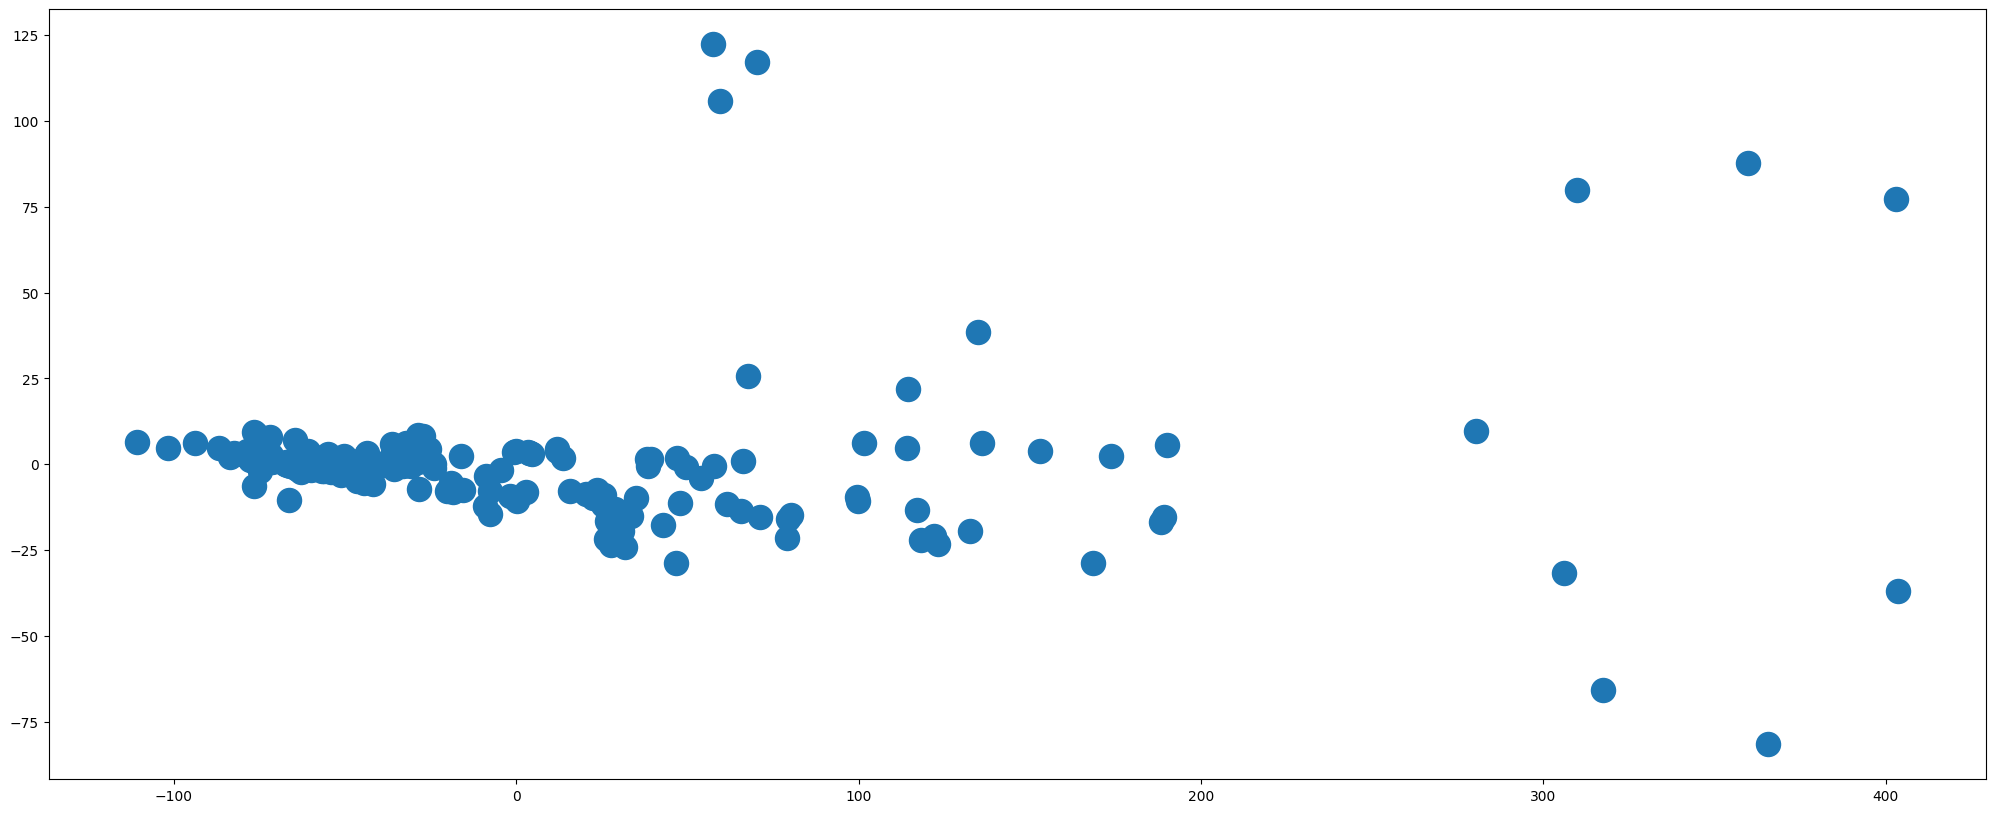

In [117]:


plt.figure(figsize=(25, 10))
plt.scatter(mySeries_transformed[:, 0], mySeries_transformed[:, 1], s=300)
plt.show()


In [118]:
kmeans = TimeSeriesKMeans(n_clusters=cluster_count, metric="dtw")

labels = kmeans.fit_predict(mySeries_transformed)


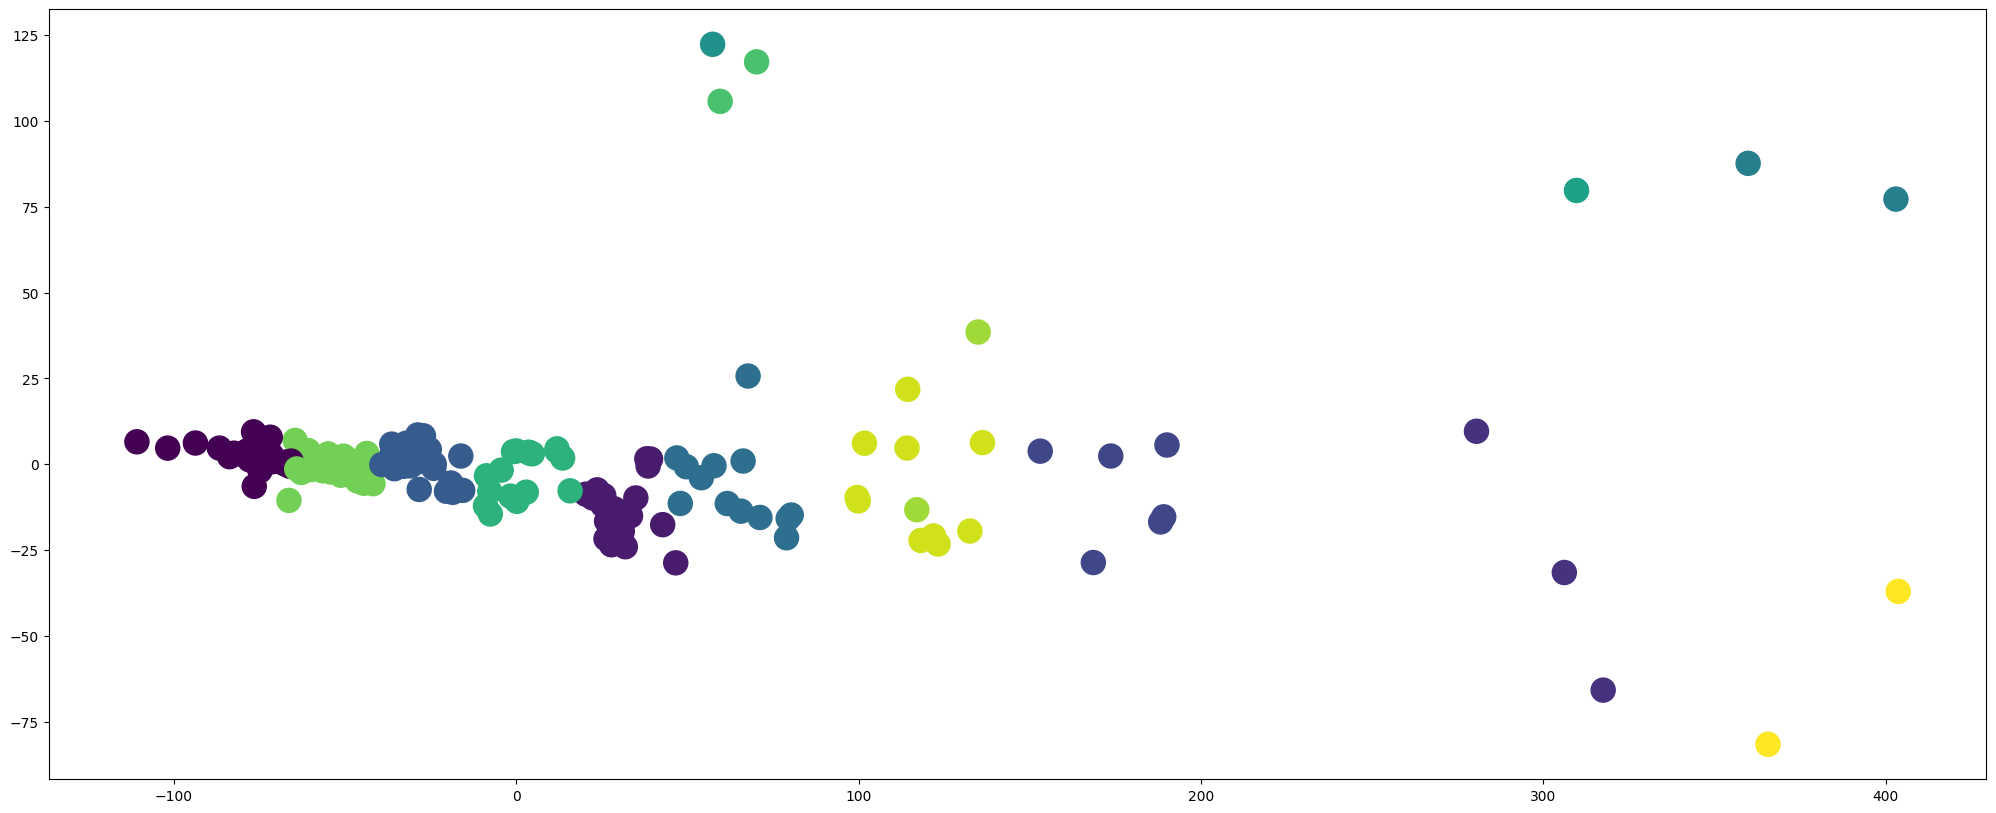

In [119]:
plt.figure(figsize=(25, 10))
plt.scatter(mySeries_transformed[:, 0],
            mySeries_transformed[:, 1], c=labels, s=300)
plt.show()


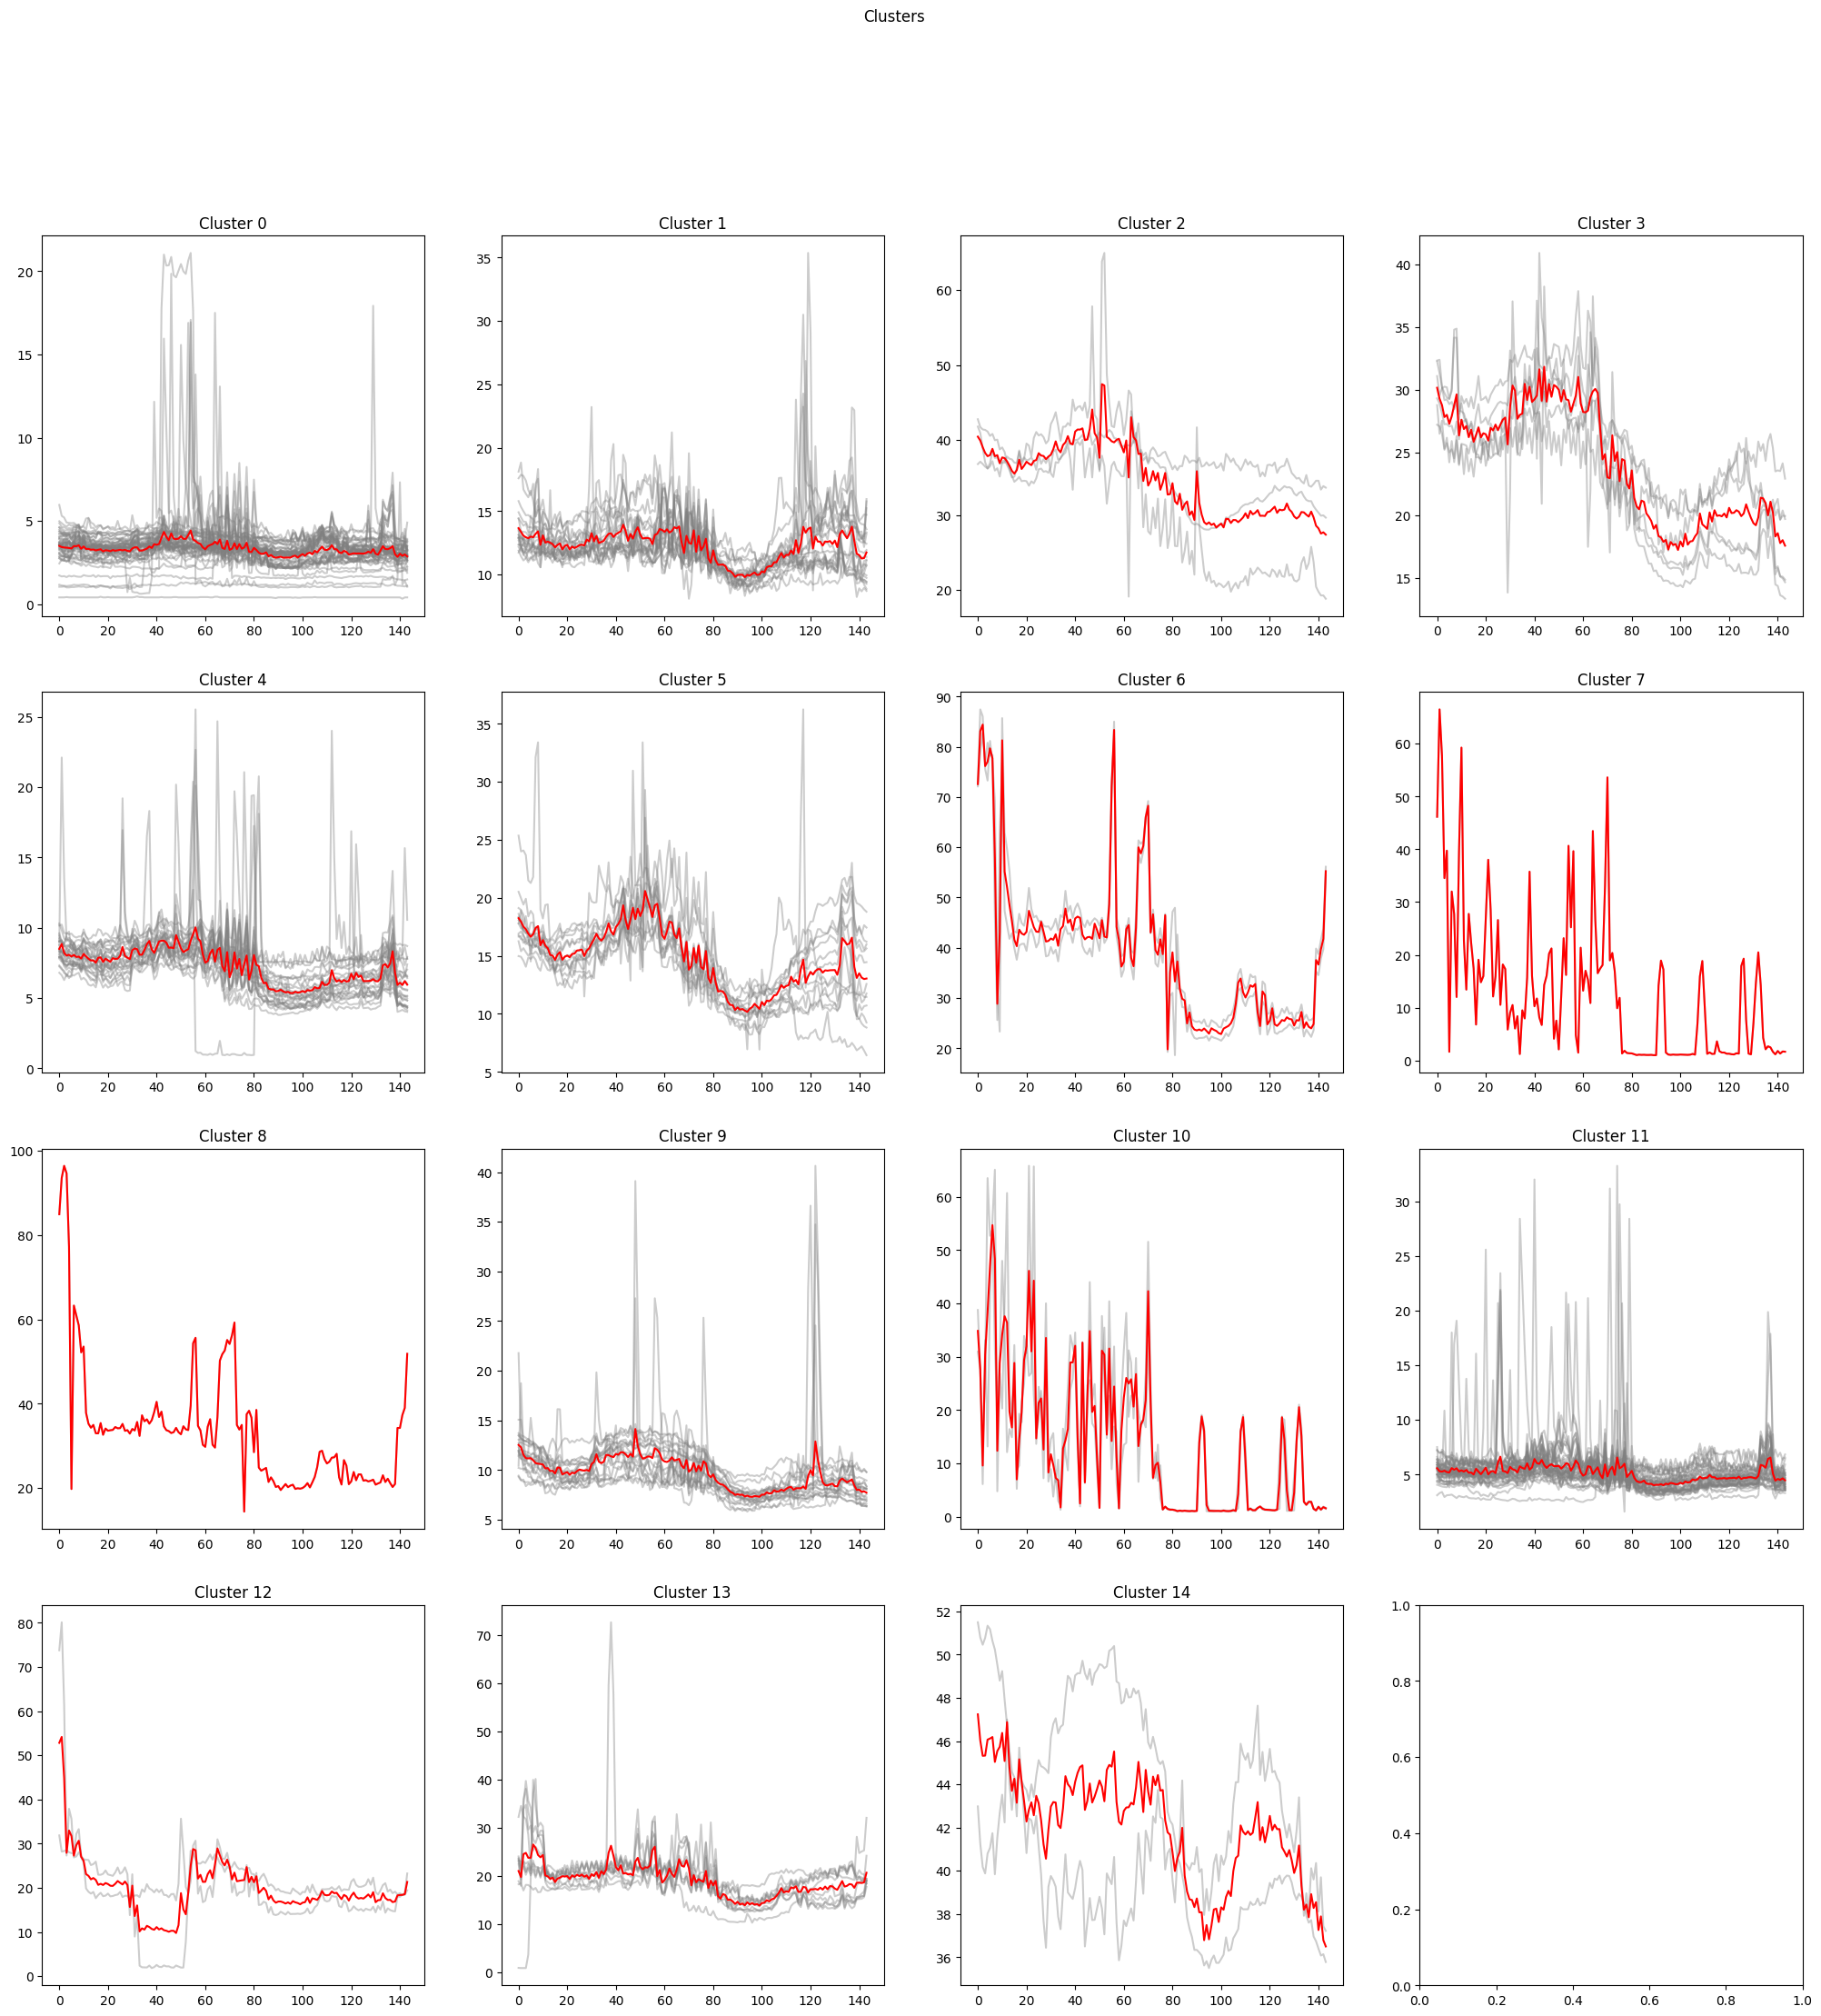

In [120]:
plot_count = math.ceil(math.sqrt(cluster_count))

fig, axs = plt.subplots(plot_count, plot_count, figsize=(25, 25))
fig.suptitle('Clusters')
row_i = 0
column_j = 0
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
        if (labels[i] == label):
            axs[row_i, column_j].plot(mySeries[i], c="gray", alpha=0.4)
            cluster.append(mySeries[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(np.average(
            np.vstack(cluster), axis=0), c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*som_y+column_j))
    column_j += 1
    if column_j % plot_count == 0:
        row_i += 1
        column_j = 0

plt.show()


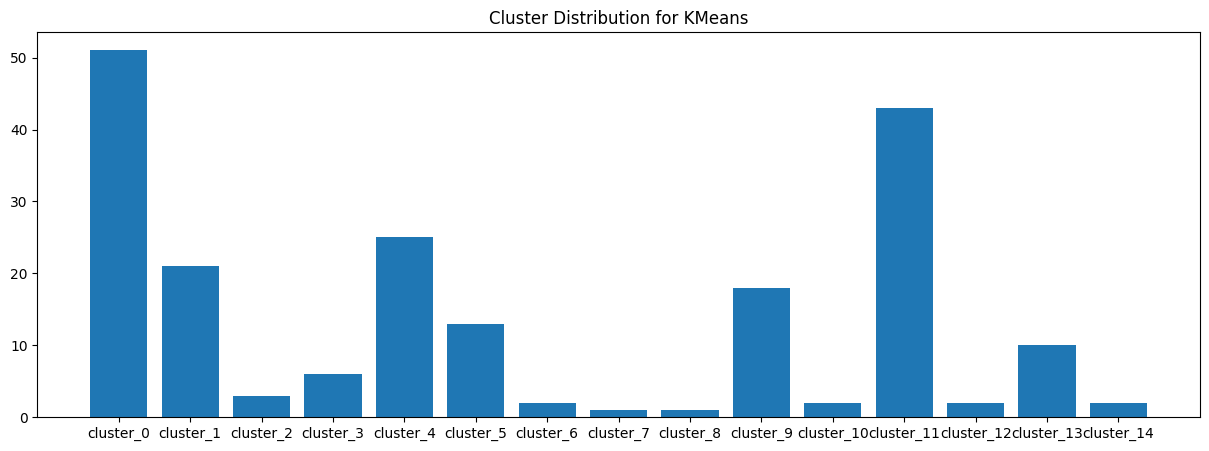

In [121]:


cluster_c = [len(labels[labels == i]) for i in range(cluster_count)]
cluster_n = ["cluster_"+str(i) for i in range(cluster_count)]
plt.figure(figsize=(15, 5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n, cluster_c)
plt.show()


In [122]:
fancy_names_for_labels = [f"Cluster {label}" for label in labels]
kmean_cluster = pd.DataFrame(zip(namesofMySeries, fancy_names_for_labels), columns=[
                             "Series", "Cluster"]).sort_values(by="Cluster")


In [123]:
uniq_cluster = pd.unique(kmean_cluster['Cluster'])
for label_name in uniq_cluster:
    cluster = pd.DataFrame(
        kmean_cluster[kmean_cluster['Cluster'] == label_name])
    cluster['Series'].to_csv('../data/2017/clusters/'+label_name+'.csv')
